<a href="https://colab.research.google.com/github/aasimwani/Algorithms/blob/master/varner_lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My Drive/varnerlab

/content/gdrive/My Drive/varnerlab


In [0]:
import pandas as pd 
import sklearn
#calculating waiting time in the ER after 
class data:
    def loading_lab_data(self):
        import pandas as pd 
        lab = pd.read_csv("labevents.csv")

        #sodium = lab[lab.ITEMID == 50983]
        INR = lab[lab.ITEMID == 51237]
        INR_data = INR[["SUBJECT_ID","VALUE","CHARTTIME"]]
        #INR_data = self.group(INR_data)
        INR_data.columns = ['SUBJECT_ID', 'INR',"CHARTTIME"]

        bilrubin = lab[lab.ITEMID == 50885]    
        bilrubin_data = bilrubin[["SUBJECT_ID","VALUE","CHARTTIME"]]
        #bilrubin_data = self.group(bilrubin_data)
        bilrubin_data.columns = ['SUBJECT_ID', 'bilrubin',"CHARTTIME"]

        PO2 = lab[lab.ITEMID == 50821]
        PO2_data = PO2[["SUBJECT_ID","VALUE","CHARTTIME"]]
        #PO2_data = self.group(PO2_data)
        PO2_data.columns = ['SUBJECT_ID', 'PO2',"CHARTTIME"]

        Oxygen = lab[lab.ITEMID == 50816]
        Oxygen_data = Oxygen[["SUBJECT_ID","VALUE","CHARTTIME"]]
        #Oxygen_data = self.group(Oxygen_data)
        Oxygen_data.columns = ['SUBJECT_ID', 'Oxygen',"CHARTTIME"]

        urea_nitrogen = lab[lab.ITEMID == 51006]
        urea_nitrogen_data = urea_nitrogen[["SUBJECT_ID","VALUE","CHARTTIME"]]
        #urea_nitrogen_data = self.group(urea_nitrogen_data)
        urea_nitrogen_data.columns = ['SUBJECT_ID', 'urea_nitrogen',"CHARTTIME"]

        wbc = lab[lab.ITEMID == 51301]
        wbc_data = wbc[["SUBJECT_ID","VALUE","CHARTTIME"]]
        #wbc_data = self.group(wbc_data)
        wbc_data.columns = ['SUBJECT_ID', 'wbc',"CHARTTIME"]

        wbc_count = lab[lab.ITEMID == 51300]
        wbc_count_data= wbc_count[["SUBJECT_ID","VALUE","CHARTTIME"]]
       # wbc_count_data = self.group(wbc_count_data)
        wbc_count_data.columns = ['SUBJECT_ID', 'wbc_count',"CHARTTIME"]

        bicarbonate = lab[lab.ITEMID == 50882]
        bicarbonate_data = bicarbonate[["SUBJECT_ID","VALUE","CHARTTIME"]]
        #bicarbonate_data = self.group(bicarbonate_data)
        bicarbonate_data.columns = ['SUBJECT_ID', 'bicarbonate',"CHARTTIME"]

        sodium_whole_blood = lab[lab.ITEMID == 50983]
        sodium_data = sodium_whole_blood[["SUBJECT_ID","VALUE","CHARTTIME"]]
        #sodium_data = self.group(sodium_data)
        sodium_data.columns = ["SUBJECT_ID","sodium_data","CHARTTIME"]

        potassium = lab[lab.ITEMID == 50971]
        potassium_data = potassium[["SUBJECT_ID","VALUE","CHARTTIME"]] 
        #potassium_data = self.group(potassium_data)
        potassium_data.columns = ["SUBJECT_ID","potassium_data","CHARTTIME"]

        potassium_whole_blood = lab[lab.ITEMID == 50822]
        potassium_whole_blood_data = potassium_whole_blood[["SUBJECT_ID","VALUE","CHARTTIME"]]
       # potassium_whole_blood_data = self.group(potassium_whole_blood_data)
        potassium_whole_blood_data.columns = ["SUBJECT_ID","potassium_whole_blood_data","CHARTTIME"]

        return INR_data, bilrubin_data, PO2_data, Oxygen_data, urea_nitrogen_data, wbc_data, wbc_count_data, bicarbonate_data, sodium_data, potassium_data, potassium_whole_blood_data

    def mean_imputation(self,data):
        return data.apply(lambda data: data.fillna(data.mean()),axis=0)
    
    def median_imputation(self,data):
        return data.apply(lambda data: data.fillna(data.median()),axis=0)

    def mode_imputation(self,data):
        return data.apply(lambda data: data.fillna(data.mode()),axis=0)
    
    def flag_imputation(self,data):
        import numpy as np 
        """
        The flag variable has three unqiue string entries (nan, 'abnormal', 'delta') which needs 
        to be imputed. 
        INPUT: This function takes only the complete dataset which should a column name FLAG 
        OUTPUT: This function outputs the entire dataset in imputed form. 
        nan - 0 
        "abnormal" = 1, "delta" = 2, Nan = 0 
        """
        new = data.FLAG.replace(["abnormal","delta",np.NaN],[1,2,0])
        data.FLAG = new 
        return data

    
    def chartevents(self):
        import pandas as pd 
        data = pd.read_csv("chartevents.csv")
        
        art_blood_pressure = data[data.ITEMID == 220050]
        art_blood_pressure_data = art_blood_pressure[["SUBJECT_ID","VALUENUM","CHARTTIME"]]
        #art_blood_pressure_data = self.group_chart(art_blood_pressure_data)
        art_blood_pressure_data.columns = ["SUBJECT_ID","art_blood_pressure","CHARTTIME"]
        
        temperature = data[data.ITEMID == 676]
        temperature_data = temperature[["SUBJECT_ID","VALUENUM","CHARTTIME"]]
        #temperature_data = self.group_chart(temperature_data)
        temperature_data.columns = ["SUBJECT_ID","temperature","CHARTTIME"]
        
        heart_rate = data[data.ITEMID == 211]
        heart_rate_data = heart_rate[["SUBJECT_ID","VALUENUM","CHARTTIME"]]
        #heart_rate_data = self.group_chart(heart_rate_data)
        heart_rate_data.columns = ["SUBJECT_ID","heart_rate","CHARTTIME"]
        
        return art_blood_pressure_data, temperature_data, heart_rate_data
        
    def loading_output_events(self):
        import pandas as pd 
        data = pd.read_csv("outputevents.csv")

        l_nephrostomy = data[data.ITEMID==226565]
        l_nephrostomy_data = l_nephrostomy[["SUBJECT_ID","CHARTTIME","VALUE"]]
        l_nephrostomy_data.columns = ["SUBJECT_ID","CHARTTIME","l_nephrostomy"]

        straight_cath = data[data.ITEMID==226567]
        straight_cath_data = straight_cath[["SUBJECT_ID","CHARTTIME","VALUE"]]
        straight_cath_data.columns = ["SUBJECT_ID","CHARTTIME","straight_cath"]

        r_uternal_stent = data[data.ITEMID==226557]
        r_uternal_stent_data = r_uternal_stent[["SUBJECT_ID","CHARTTIME","VALUE"]]
        r_uternal_stent_data.columns = ["SUBJECT_ID","CHARTTIME","r_uternal_stent"]

        l_uternal_stent = data[data.ITEMID==226558]
        l_uternal_stent_data = l_uternal_stent[["SUBJECT_ID","CHARTTIME","VALUE"]]
        l_uternal_stent_data.columns = ["SUBJECT_ID","CHARTTIME","l_uternal_stent"]

        gu_irrigant_volume_in = data[data.ITEMID == 227488]
        gu_irrigant_volume_in_data = gu_irrigant_volume_in[["SUBJECT_ID","CHARTTIME","VALUE"]]
        gu_irrigant_volume_in_data.columns = ["SUBJECT_ID","CHARTTIME","gu_irrigant_volume_in"]

        urine_volume_out = data[data.ITEMID == 227489]
        urine_volume_out_data = urine_volume_out[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_volume_out_data.columns = ["SUBJECT_ID","CHARTTIME","urine_volume_out"]    

        urine_out_foley =  data[data.ITEMID == 40055]
        urine_out_foley_data = urine_out_foley[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_foley_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_foley"]

        urine = data[data.ITEMID == 43175]
        urine_data = urine[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_data.columns = ["SUBJECT_ID","CHARTTIME","urine"]

        urine_out_void = data[data.ITEMID == 40069]
        urine_out_void_data = urine_out_void[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_void_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_void"]

        urine_out_condom_path = data[data.ITEMID == 40094]
        urine_out_condom_path_data = urine_out_condom_path[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_condom_path_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_condom_path"]

        urine_out_suprapubic = data[data.ITEMID == 40715]
        urine_out_suprapubic_data =urine_out_suprapubic[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_suprapubic_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_suprapubic"]

        urine_out_illeocoduit =  data[data.ITEMID == 40473]
        urine_out_illeocoduit_data = urine_out_illeocoduit[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_illeocoduit_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_illeocoduit"]

        urine_out_incontinent =  data[data.ITEMID == 40085]
        urine_out_incontinent_data = urine_out_incontinent[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_incontinent_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_incontinent"]

        urine_out_rt_nephrostomy = data[data.ITEMID == 40057]
        urine_out_rt_nephrostomy_data = urine_out_rt_nephrostomy[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_rt_nephrostomy_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_rt_nephrostomy"]

        urine_out_lt_nephrostomy = data[data.ITEMID == 40056]
        urine_out_lt_nephrostomy_data = urine_out_lt_nephrostomy[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_lt_nephrostomy_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_lt_nephrostomy"]

        urine_out_other = data[data.ITEMID == 40405]
        urine_out_other_data = urine_out_other[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_other_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_other"]

        urine_out_straight_cath = data[data.ITEMID == 40428]
        urine_out_straight_cath_data = urine_out_straight_cath[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_straight_cath_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_straight_cath"]

        orine_out_incontinent =  data[data.ITEMID == 40086]
        orine_out_incontinent_data = orine_out_incontinent[["SUBJECT_ID","CHARTTIME","VALUE"]]
        orine_out_incontinent_data.columns = ["SUBJECT_ID","CHARTTIME","orine_out_incontinent"]

        urine_out_ureteral_stent1 =  data[data.ITEMID == 40096]
        urine_out_ureteral_stent1_data = urine_out_ureteral_stent1[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_ureteral_stent1_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_ureteral_stent1"]

        urine_out_ureteral_stent2 =  data[data.ITEMID == 40651]
        urine_out_ureteral_stent2_data = urine_out_ureteral_stent2[["SUBJECT_ID","CHARTTIME","VALUE"]]
        urine_out_ureteral_stent2_data.columns = ["SUBJECT_ID","CHARTTIME","urine_out_ureteral_stent2"]

        foley = data[data.ITEMID == 226559]
        foley_data = foley[["SUBJECT_ID","CHARTTIME","VALUE"]]
        foley_data.columns = ["SUBJECT_ID","CHARTTIME","foley"]

        void =  data[data.ITEMID == 226560]
        void_data = void[["SUBJECT_ID","CHARTTIME","VALUE"]]
        void_data.columns = ["SUBJECT_ID","CHARTTIME","void"]

        condom_cath = data[data.ITEMID == 226561]
        condom_cath_data = condom_cath[["SUBJECT_ID","CHARTTIME","VALUE"]]
        condom_cath_data.columns = ["SUBJECT_ID","CHARTTIME","condom_cath"]

        illeoconduit = data[data.ITEMID == 226584]
        illeoconduit_data = illeoconduit[["SUBJECT_ID","CHARTTIME","VALUE"]]
        illeoconduit_data.columns = ["SUBJECT_ID","CHARTTIME","illeoconduit"]

        suprapubic = data[data.ITEMID == 226563]
        suprapubic_data = suprapubic[["SUBJECT_ID","CHARTTIME","VALUE"]]
        suprapubic_data.columns = ["SUBJECT_ID","CHARTTIME","suprapubic"]

        r_nephrostomy =  data[data.ITEMID == 226564]
        r_nephrostomy_data = r_nephrostomy[["SUBJECT_ID","CHARTTIME","VALUE"]]
        r_nephrostomy_data.columns = ["SUBJECT_ID","CHARTTIME","r_nephrostomy"]

        return l_nephrostomy_data, straight_cath_data, r_uternal_stent_data, l_uternal_stent_data, gu_irrigant_volume_in_data, urine_volume_out_data, urine_out_foley_data, urine_data, urine_out_void_data, urine_out_condom_path_data, urine_out_suprapubic_data,urine_out_illeocoduit_data,urine_out_incontinent_data, urine_out_rt_nephrostomy_data, urine_out_lt_nephrostomy_data, urine_out_other_data, urine_out_straight_cath_data, orine_out_incontinent_data, urine_out_ureteral_stent1_data, urine_out_ureteral_stent2_data, foley_data, void_data, condom_cath_data, illeoconduit_data, suprapubic_data,r_nephrostomy_data

  
    def group(self,data):
        import pandas as pd 
        data['VALUE']=pd.to_numeric(data['VALUE'], errors='coerce').fillna(0)
        mean = data.groupby(by = ["SUBJECT_ID"]).agg({'VALUE': 'mean'})
        mean = mean.reset_index()
        return mean 

    def group_chart(self,data):
        import pandas as pd 
        data['VALUENUM']=pd.to_numeric(data['VALUENUM'], errors='coerce').fillna(0)
        mean = data.groupby(by = ["SUBJECT_ID"]).agg({'VALUENUM': 'mean'})
        mean = mean.reset_index()
        return mean 

    
    def merge(self,part1,part2):
        import pandas as pd 
        return pd.merge(part1,part2,on = ["SUBJECT_ID","CHARTTIME"],how = "outer")

    def merging_lab_events(self):
        a,b,c,d,e,f,g,h,i,j,k = self.loading_lab_data()
        merge1 = self.merge(a,b)
        merge2 = self.merge(merge1,c)
        merge3 = self.merge(merge2,d)
        merge4 = self.merge(merge3,e)
        merge5 = self.merge(merge4,f)
        merge6 = self.merge(merge5,g)
        merge7 = self.merge(merge6,h)
        merge8 = self.merge(merge7,i)
        merge9 = self.merge(merge8,j)
        merge10 = self.merge(merge9,k)
        return merge10


    def merging_output_events(self):
        a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z = self.loading_output_events()
        merge1 = self.merge(a,b)
        merge2 = self.merge(merge1,c)
        merge3 = self.merge(merge2,d)
        merge4 = self.merge(merge3,e)
        merge5 = self.merge(merge4,f)
        merge6 = self.merge(merge5,g)
        merge7 = self.merge(merge6,h)
        merge8 = self.merge(merge7,i)
        merge9 = self.merge(merge8,j)
        merge10 = self.merge(merge9,k)
        merge11 = self.merge(merge10,l)
        merge12 = self.merge(merge11,m)
        merge13 = self.merge(merge12,n)
        merge14 = self.merge(merge13,o)
        merge15 = self.merge(merge14,p)
        merge16 = self.merge(merge15,q)
        merge17 = self.merge(merge16,r)
        merge18 = self.merge(merge17,s)
        merge19 = self.merge(merge18,t)
        merge20 = self.merge(merge19,u)
        merge21 = self.merge(merge20,v)
        merge22 = self.merge(merge21,w)
        merge23 = self.merge(merge22,x)
        merge24 = self.merge(merge23,y)
        merge25 = self.merge(merge24,z)
        return merge25
    
    def merging_chartevents(self):
        a,b,c = self.chartevents()
        merge1 = self.merge(a,b)
        merge2 = self.merge(merge1,c)
        return merge2 
    
    def fill_missing_values_with(self,data,item):
        return data.fillna(item)
    
    def percentage_missing_values(self,data):
        return data.isnull().sum()/len(data)*100
    
    def do_lstm_model(self,df,ts,look_back,epochs,type_ = None,train_fraction = 0.67):
        import numpy
        import matplotlib.pyplot as plt
        from pandas import read_csv
        import math
        from keras.models import Sequential
        from keras.layers import Dense
        from keras.layers import LSTM
        from sklearn.preprocessing import MinMaxScaler
        from sklearn.metrics import mean_squared_error

        # Convert an array of values into a dataset matrix
        def create_dataset(self, dataset, look_back=1):
            dataX, dataY = [], []
            for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                dataX.append(a)
                dataY.append(dataset[i + look_back, 0])
            return numpy.array(dataX), numpy.array(dataY)

        # Fix random seed for reproducibility
        numpy.random.seed(7)

        # Get dataset
        dataset = df[ts].values
        dataset = dataset.astype('float32')

        # Normalize the dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset.reshape(-1, 1))

        # Split into train and test sets
        train_size = int(len(dataset) * train_fraction)
        test_size = int(len(dataset) - train_size)
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

        # Reshape into X=t and Y=t+1
        look_back = look_back
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)

        # Reshape input to be [samples, time steps, features]
        if type_ == 'regression with time steps':
            trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
            testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
        elif type_ == 'stacked with memory between batches':
            trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
            testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
        else:
            trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
            testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

        # Create and fit the LSTM network
        batch_size = 1
        model = Sequential()

        if type_ == 'regression with time steps':
            model.add(LSTM(4, input_shape=(look_back, 1)))
        elif type_ == 'memory between batches':
            model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
        elif type_ == 'stacked with memory between batches':
            model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
            model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
        else:
            model.add(LSTM(4, input_shape=(1, look_back)))
            model.add(Dense(1))
            model.compile(loss='mean_squared_error', optimizer='adam')

        if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
            for i in range(100):
                model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
                model.reset_states()
            else:
                model.fit(trainX,trainY,epochs = epochs,batch_size = 1,verbose = 2)

        # Make predictions
        if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
            trainPredict = model.predict(trainX, batch_size=batch_size)
            testPredict = model.predict(testX, batch_size=batch_size)
        else:
            trainPredict = model.predict(trainX)
            testPredict = model.predict(testX)

        # Invert predictions
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])

        # Calculate root mean squared error
        trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        print('Train Score: %.2f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
        print('Test Score: %.2f RMSE' % (testScore))

        # Shift train predictions for plotting
        trainPredictPlot = numpy.empty_like(dataset)
        trainPredictPlot[:, :] = numpy.nan
        trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

        # Shift test predictions for plotting
        testPredictPlot = numpy.empty_like(dataset)
        testPredictPlot[:, :] = numpy.nan
        testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

        # Plot baseline and predictions
        plt.figure(figsize=(15,10))
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        plt.close()

        return

    def MICE_imputation(self,data):
        col = data.columns.values 
        dt = data["CHARTTIME"]
        data.drop(columns = ["CHARTTIME"])
        from fancyimpute import IterativeImputer as MICE
        df1 = MICE().fit_transform(data)
        df1 = pd.DataFrame(df1)
        df1 = pd.concat([dt, df1], axis='col')
        df1.columns = col
        return df1


        # ## 1. Requirements
    def MIDA(self,b):
        import os
        import random
        import numpy as np
        import pandas as pd
        from math import sqrt
        from sklearn.metrics import mean_squared_error
        from sklearn.preprocessing import MinMaxScaler
        import torch
        import torch.nn as nn
        import torch.utils.data
        import torch.optim as optim


        # ## 2. Set Args
        theta = 7
        num_epochs = 5
        dropout_ratio = 0.5
        #data_path = 'data/BostonHousing.csv'
        data_path = '~/Desktop/filled.csv'
        mechanism = 'mcar'
        method = 'uniform'
        test_size = 0.3
        use_cuda = False
        batch_size  = 5 # not in the paper


        # ## 3. Prepare Data
        data = b.values
        rows, cols = data.shape
        shuffled_index = np.random.permutation(rows)
        train_index = shuffled_index[:int(rows*(1-test_size))]
        test_index = shuffled_index[int(rows*(1-test_size)):]
        train_data = data[train_index, :]
        test_data = data[test_index, :]
        # standardized between 0 and 1
        scaler = MinMaxScaler()
        scaler.fit(train_data)
        train_data = scaler.transform(train_data)
        test_data = scaler.transform(test_data)




        def missing_method(raw_data, mechanism='mcar', method='uniform') :
            
            data = raw_data.copy()
            rows, cols = data.shape
            # missingness threshold
            t = 0.2
            if mechanism == 'mcar' :
                if method == 'uniform' :
                    # uniform random vector
                    v = np.random.uniform(size=(rows, cols))
                    # missing values where v<=t
                    mask = (v<=t)
                    data[mask] = 0

                elif method == 'random' :
                    # only half of the attributes to have missing value
                    missing_cols = np.random.choice(cols, cols//2)
                    c = np.zeros(cols, dtype=bool)
                    c[missing_cols] = True
                    # uniform random vector
                    v = np.random.uniform(size=(rows, cols))
                    # missing values where v<=t
                    mask = (v<=t)*c
                    data[mask] = 0

                else :
                    print("Error : There are no such method")
                    raise
            
            elif mechanism == 'mnar' :
                
                if method == 'uniform' :
                    # randomly sample two attributes
                    sample_cols = np.random.choice(cols, 2)
                    # calculate ther median m1, m2
                    m1, m2 = np.median(data[:,sample_cols], axis=0)
                    # uniform random vector
                    v = np.random.uniform(size=(rows, cols))
                    # missing values where (v<=t) and (x1 <= m1 or x2 >= m2)
                    m1 = data[:,sample_cols[0]] <= m1
                    m2 = data[:,sample_cols[1]] >= m2
                    m = (m1*m2)[:, np.newaxis]
                    mask = m*(v<=t)
                    data[mask] = 0


                elif method == 'random' :
                    # only half of the attributes to have missing value
                    missing_cols = np.random.choice(cols, cols//2)
                    c = np.zeros(cols, dtype=bool)
                    c[missing_cols] = True
                    # randomly sample two attributes
                    sample_cols = np.random.choice(cols, 2)
                    # calculate ther median m1, m2
                    m1, m2 = np.median(data[:,sample_cols], axis=0)
                    # uniform random vector
                    v = np.random.uniform(size=(rows, cols))
                    # missing values where (v<=t) and (x1 <= m1 or x2 >= m2)
                    m1 = data[:,sample_cols[0]] <= m1
                    m2 = data[:,sample_cols[1]] >= m2
                    m = (m1*m2)[:, np.newaxis]
                    mask = m*(v<=t)*c
                    data[mask] = 0

                else :
                    print("Error : There is no such method")
                    raise
            
            else :
                print("Error : There is no such mechanism")
                raise
                
            return data, mask

        missed_data, mask = missing_method(test_data, mechanism=mechanism, method=method)
        missed_data = torch.from_numpy(missed_data).float()
        train_data = torch.from_numpy(train_data).float()
        train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size,shuffle=True)


        # ## 4. Define Model
        device = torch.device("cuda" if use_cuda else "cpu")


        # In[7]:


        class Autoencoder(nn.Module):
            def __init__(self, dim):
                super(Autoencoder, self).__init__()
                self.dim = dim
                self.drop_out = nn.Dropout(p=0.5)
                self.encoder = nn.Sequential(
                    nn.Linear(dim+theta*0, dim+theta*1),
                    nn.Tanh(),
                    nn.Linear(dim+theta*1, dim+theta*2),
                    nn.Tanh(),
                    nn.Linear(dim+theta*2, dim+theta*3)
                )
                    
                self.decoder = nn.Sequential(
                    nn.Linear(dim+theta*3, dim+theta*2),
                    nn.Tanh(),
                    nn.Linear(dim+theta*2, dim+theta*1),
                    nn.Tanh(),
                    nn.Linear(dim+theta*1, dim+theta*0)
                )
                
            def forward(self, x):
                x = x.view(-1, self.dim)
                x_missed = self.drop_out(x)
                z = self.encoder(x_missed)
                out = self.decoder(z)
                out = out.view(-1, self.dim)
                return out



        model = Autoencoder(dim=cols).to(device)
        # ##Define Loss and Optimizer
        loss = nn.MSELoss()
        optimizer = optim.SGD(model.parameters(), momentum=0.99, lr=0.01, nesterov=True)
        # ## 6. Train Model
        cost_list = []
        early_stop = False

        for epoch in range(num_epochs):
            
            total_batch = len(train_data) // batch_size
            
            for i, batch_data in enumerate(train_loader):
                batch_data = batch_data.to(device)
                reconst_data = model(batch_data)
                cost = loss(reconst_data, batch_data)
                
                optimizer.zero_grad()
                cost.backward()
                optimizer.step()
                        
                if (i+1) % (total_batch//2) == 0:
                    print('Epoch [%d/%d], lter [%d/%d], Loss: %.6f'
                        %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
                    
                # early stopping rule 1 : MSE < 1e-06
                if cost.item() < 1e-06 :
                    early_stop = True
                    break
                    
        #         early stopping rule 2 : simple moving average of length 5
        #         sometimes it doesn't work well.
        #         if len(cost_list) > 5 :
        #            if cost.item() > np.mean(cost_list[-5:]):
        #                early_stop = True
        #                break
                        
                cost_list.append(cost.item())

            if early_stop :
                break
                
        print("Learning Finished!")

        # ## 7. Test Model
        model.eval()
        filled_data = model(missed_data.to(device))
        filled_data = filled_data.cpu().detach().numpy()


        rmse_sum = 0

        for i in range(cols) :
            if mask[:,i].sum() > 0 :
                y_actual = test_data[:,i][mask[:,i]]
                y_predicted = filled_data[:,i][mask[:,i]], sklearn
                rmse = sqrt(mean_squared_error(y_actual, y_predicted))
                rmse_sum += rmse

        print("RMSE_SUM :", rmse_sum)
        filled_data = pd.DataFrame(filled_data)
        #filled_data.to_csv("~/Desktop/MIDA_data.csv")
        return filled_data
    
    def method_random_forest(self,data,label):
        """
        data : There needs to be two inputs dataframe and the label name 
        label: The label name needs to be having a string format.  
        
        """
        from sklearn.model_selection import train_test_split
        import pandas as pd 
        import numpy as np
        #Split the data into training and testing sets
        Y = data[label]
        X = data.loc[:, data.columns != label]
        train_features, test_features, train_labels, test_labels = train_test_split(X, Y,test_size = 0.25, random_state = 42)
        from sklearn.ensemble import RandomForestRegressor
        # Instantiate model with 1000 decision trees
        rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
        # Train the model on training data
        rf.fit(train_features, train_labels)
        # Use the forest's predict method on the test data
        predictions = rf.predict(test_features)
        # Calculate the absolute errors
        errors = abs(predictions - test_labels)
        # Print out the mean absolute error (mae)
        #print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
        #mape = 100 * (errors / test_labels)
        # Calculate and display accuracy
        #accuracy = 100 - np.mean(mape)
        return np.sqrt(((predictions - test_labels ) ** 2).mean())
        #return print('Accuracy:', round(accuracy, 2), '%.')

In [0]:
c = data()

def scaling(data):
    import pandas as pd 
    import numpy as np 
    from sklearn.preprocessing import scale
    return scale(data, axis=0, with_mean=True, with_std=True, copy=True)

def loading_data():
    c = data()
    stage1 = c.merging_lab_events()
    stage2 = c.merging_chartevents()
    new = pd.merge(stage1,stage2,how = "outer",on = ["SUBJECT_ID","CHARTTIME"])
    s = new.columns.values
    t = scaling(new)
    t = pd.DataFrame(t)
    t.columns = s
    return t 

def processed_data(data, types,error = False):
    """
    types: mean, median, mode 
    calculate: if no it will return not return any error, if yes it will return the error based on random forest error.  
    """
    new = data
    col = new.columns.values 
    if types == "mean":
        if error == False:
            return c.mean_imputation(new)
        else :
            file = c.method_random_forest(c.mean_imputation(new),label = "INR")
            return file

    if types == "median":
        if error == False:
            return c.median_imputation(new)
        else :
            return c.method_random_forest(c.median_imputation(new),label= "INR")
        
    if types == "mode":
        if error == False:
            return c.mode_imputation(new) 
        else :
            return c.method_random_forest(c.mode_imputation(new),label = "INR")

    if types == "mice":
        if error == False:
            return c.mean_imputation(new)
        else :
            file = c.method_random_forest(c.MICE_imputation(new),label = "INR")
            return file
      
    if types == "mida":
        if error == False:
          return c.mean_imputation(new)
        else :
          new = processed_data(new, types = "mean",error = False)
          new = c.MIDA(processed_data(new, types = "mean",error = False))
          new.columns = col 
          file = c.method_random_forest(data= new,label = "INR")
          return file

In [0]:
b = loading_data()

In [0]:
l = processed_data(b, types="mean",error = False)

In [68]:
c = data()
kkt = c.merging_output_events()
kkt.shape

(3383841, 28)

In [0]:
complete = pd.merge(kkt,kk,how = "outer",on = ["SUBJECT_ID","CHARTTIME"])

In [74]:
complete.shape

(4961608, 39)

In [0]:
complete

In [0]:
method_random_forest(data=t,label="INR" )

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from pandas import get_dummies
from sklearn.model_selection import train_test_split
# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [0]:
t.columns.values 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [0]:
g=sns.pairplot(a, hue="INR", size= 2.5)

In [0]:
c

In [0]:
processed_data(data = b,types= "mice",error=True)

0.5342928892268465

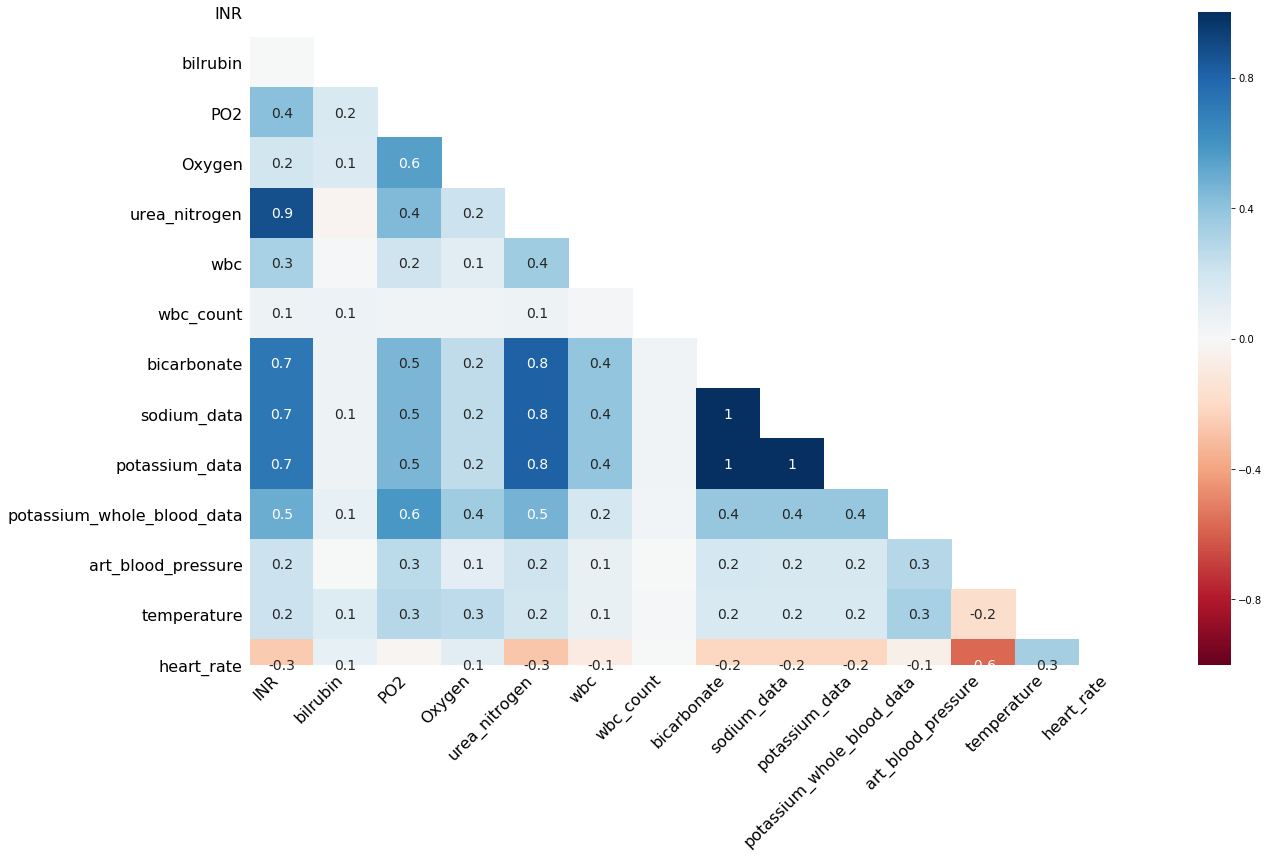

In [0]:
import missingno as msno
"""merged_df = p 
merged_df.columns[merged_df.isnull().any()].tolist()
msno.matrix(merged_df[missingdata_df])
msno.bar(merged_df[missingdata_df], color="blue", log=True, figsize=(30,18))

merged_df = pd.merge(train_df,properties_df)
missingdata_df = merged_df.columns[merged_df.isnull().any()].tolist()
msno.matrix(merged_df[missingdata_df])"""
msno.heatmap(b)

In [0]:
b = loading_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
k = processed_data(data = b,types = "mean")

In [0]:
k

In [0]:
from missingpy import KNNImputer
imputer = KNNImputer(missing_values="NaN", n_neighbors=5, weights="uniform", 
                 metric="masked_euclidean", row_max_missing=0.5, 
                 col_max_missing=0.99, copy=True)
X_imputed = imputer.fit_transform(b)

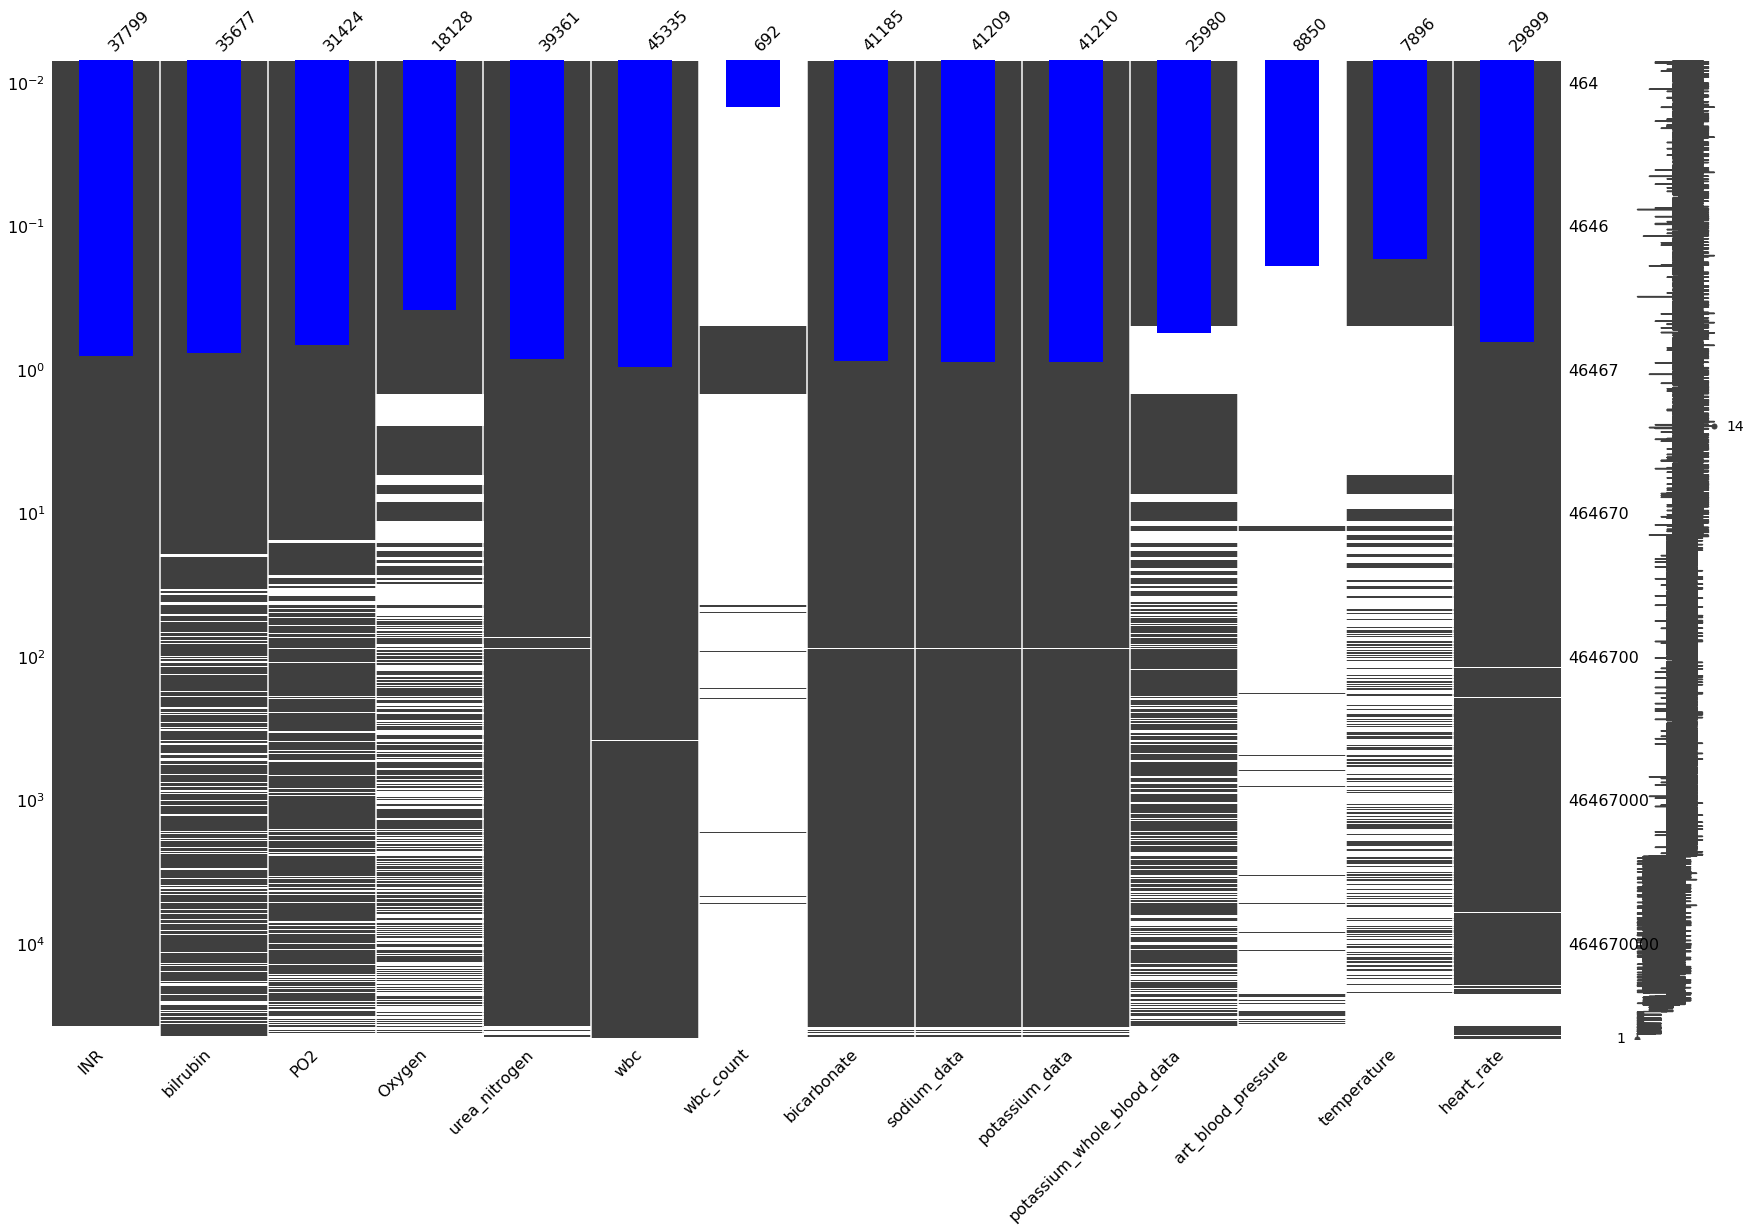

In [0]:
import missingno as msno
merged_df = b
missingdata_df = merged_df.columns[merged_df.isnull().any()].tolist()
msno.matrix(merged_df[missingdata_df])
msno.bar(merged_df[missingdata_df], color="blue", log=True, figsize=(30,18))

In [0]:
def VAE():
  import random
  import numpy as np
  import tensorflow as tf

  Normal = tf.contrib.distributions.Normal
  np.random.seed(0)
  tf.set_random_seed(0)

  def xavier_init(fan_in, fan_out, constant=1): 
      """ Xavier initialization of network weights"""
      # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
      low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
      high = constant*np.sqrt(6.0/(fan_in + fan_out))
      return tf.random_uniform((fan_in, fan_out), 
                              minval=low, maxval=high, 
                              dtype=tf.float32)

  class TFVariationalAutoencoder(object):
      """ Variation Autoencoder (VAE) with an sklearn-like interface implemented using TensorFlow.
      
      This implementation uses probabilistic encoders and decoders using Gaussian 
      distributions and realized by multi-layer perceptrons. The VAE can be learned
      end-to-end.
      
      See "Auto-Encoding Variational Bayes" by Kingma and Welling for more details.
      """
      def __init__(self, network_architecture, transfer_fct=tf.nn.relu, 
                  learning_rate=0.001, batch_size=100):
          self.network_architecture = network_architecture
          self.transfer_fct = transfer_fct
          self.learning_rate = learning_rate
          self.batch_size = batch_size
          
          # tf Graph input
          self.x = tf.placeholder(tf.float32, [None, network_architecture["n_input"]])
          
          # Create autoencoder network
          self._create_network()
          
          # Define loss function based variational upper-bound and 
          # corresponding optimizer
          self._create_loss_optimizer()
          
          # Initializing the tensor flow variables
          init = tf.global_variables_initializer()

          # Launch the session
          self.sess = tf.InteractiveSession()
          self.sess.run(init)
      
      def _create_network(self):
          # Initialize autoencode network weights and biases
          network_weights = self._initialize_weights(**self.network_architecture)

          # Use recognition network to determine mean and 
          # (log) variance of Gaussian distribution in latent
          # space
          self.z_mean, self.z_log_sigma_sq = \
              self._recognition_network(network_weights["weights_recog"], 
                                        network_weights["biases_recog"])

          # Draw one sample z from Gaussian distribution
          eps = tf.random_normal(tf.shape(self.z_mean), 0, 1, 
                                dtype=tf.float32)
          # writing eps as above keeps self.z of the same size as the input, so
          # it is not tied to a specific batch size as in the original (below)
  #        eps = tf.random_normal((self.batch_size, n_z), 0, 1, 
  #                               dtype=tf.float32)
          # z = mu + sigma*epsilon
          self.z = tf.add(self.z_mean, 
                          tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

          # Use generator to determine mean and 
          # (log) variance of Gaussian distribution of reconstructed input
          self.x_hat_mean, self.x_hat_log_sigma_sq = \
              self._generator_network(network_weights["weights_gener"],
                                      network_weights["biases_gener"])
              
      def _initialize_weights(self, n_hidden_recog_1, n_hidden_recog_2, 
                              n_hidden_gener_1,  n_hidden_gener_2, 
                              n_input, n_z):
          all_weights = dict()
          all_weights['weights_recog'] = {
              'h1': tf.Variable(xavier_init(n_input, n_hidden_recog_1)),
              'h2': tf.Variable(xavier_init(n_hidden_recog_1, n_hidden_recog_2)),
              'out_mean': tf.Variable(xavier_init(n_hidden_recog_2, n_z)),
              'out_log_sigma': tf.Variable(xavier_init(n_hidden_recog_2, n_z))}
          all_weights['biases_recog'] = {
              'b1': tf.Variable(tf.zeros([n_hidden_recog_1], dtype=tf.float32)),
              'b2': tf.Variable(tf.zeros([n_hidden_recog_2], dtype=tf.float32)),
              'out_mean': tf.Variable(tf.zeros([n_z], dtype=tf.float32)),
              'out_log_sigma': tf.Variable(tf.zeros([n_z], dtype=tf.float32))}
          all_weights['weights_gener'] = {
              'h1': tf.Variable(xavier_init(n_z, n_hidden_gener_1)),
              'h2': tf.Variable(xavier_init(n_hidden_gener_1, n_hidden_gener_2)),
              'out_mean': tf.Variable(xavier_init(n_hidden_gener_2, n_input)),
              'out_log_sigma': tf.Variable(xavier_init(n_hidden_gener_2, n_input))}
          all_weights['biases_gener'] = {
              'b1': tf.Variable(tf.zeros([n_hidden_gener_1], dtype=tf.float32)),
              'b2': tf.Variable(tf.zeros([n_hidden_gener_2], dtype=tf.float32)),
              'out_mean': tf.Variable(tf.zeros([n_input], dtype=tf.float32)),
              'out_log_sigma': tf.Variable(tf.zeros([n_input], dtype=tf.float32))}
          return all_weights
              
      def _recognition_network(self, weights, biases):
          # Generate probabilistic encoder (recognition network), which
          # maps inputs onto a normal distribution in latent space.
          # The transformation is parametrized and can be learned.
          layer_1 = self.transfer_fct(tf.add(tf.matmul(self.x, weights['h1']), 
                                            biases['b1'])) 
          layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                            biases['b2'])) 
          z_mean = tf.add(tf.matmul(layer_2, weights['out_mean']),
                          biases['out_mean'])
          z_log_sigma_sq = \
              tf.add(tf.matmul(layer_2, weights['out_log_sigma']), 
                    biases['out_log_sigma'])
          return (z_mean, z_log_sigma_sq)
      
      def _generator_network(self, weights, biases):
          # Generate probabilistic decoder (decoder network), which
          # maps points in latent space onto a normal distribution in data space.
          # The transformation is parametrized and can be learned.
          layer_1 = self.transfer_fct(tf.add(tf.matmul(self.z, weights['h1']), 
                                            biases['b1'])) 
          layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                            biases['b2'])) 
          x_hat_mean = tf.add(tf.matmul(layer_2, weights['out_mean']),
                          biases['out_mean'])
          x_hat_log_sigma_sq = \
              tf.add(tf.matmul(layer_2, weights['out_log_sigma']), 
                    biases['out_log_sigma'])
          return (x_hat_mean, x_hat_log_sigma_sq)
              
      def _create_loss_optimizer(self):
          # The loss is composed of two terms:
          # 1.) The reconstruction loss (the negative log probability
          #     of the input under the reconstructed Gaussian distribution 
          #     induced by the decoder in the data space).
          #     This can be interpreted as the number of "nats" required
          #     for reconstructing the input when the activation in latent
          #     is given.
          
          X_hat_distribution = Normal(loc=self.x_hat_mean,
                                      scale=tf.exp(self.x_hat_log_sigma_sq))
          reconstr_loss = \
              -tf.reduce_sum(X_hat_distribution.log_prob(self.x), 1)
              
          # 2.) The latent loss, which is defined as the Kullback Leibler divergence 
          ##    between the distribution in latent space induced by the encoder on 
          #     the data and some prior. This acts as a kind of regularizer.
          #     This can be interpreted as the number of "nats" required
          #     for transmitting the latent space distribution given
          #     the prior.
          latent_loss = -0.5 * tf.reduce_sum(1 + self.z_log_sigma_sq 
                                            - tf.square(self.z_mean) 
                                            - tf.exp(self.z_log_sigma_sq), 1)
          self.cost = tf.reduce_mean(reconstr_loss + latent_loss)   # average over batch
          
  #        # Use ADAM optimizer
  #        self.optimizer = \
  #            tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
          
          # Use RMSProp optimizer
          self.optimizer = \
              tf.train.RMSPropOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
          
      def partial_fit(self, X):
          """Train model based on mini-batch of input data.
          
          Return cost of mini-batch.
          """
          opt, cost = self.sess.run((self.optimizer, self.cost), 
                                    feed_dict={self.x: X})
          return cost
      
      def transform(self, X):
          """Transform data by mapping it into the latent space."""
          # Note: This maps to mean of distribution, we could alternatively
          # sample from Gaussian distribution
          return self.sess.run(self.z_mean, feed_dict={self.x: X})
      
      def generate(self, z_mu=None, n_samples = 100):
          """ Generate data by sampling from latent space.
          
          If z_mu is not None, data for this point in latent space is
          generated. Otherwise, z_mu is drawn from prior in latent 
          space.
          """
          if z_mu is None:
              z_mu = np.random.normal(size=[n_samples,self.network_architecture["n_z"]])
          
          x_hat_mu, x_hat_logsigsq = self.sess.run((self.x_hat_mean, self.x_hat_log_sigma_sq), 
                              feed_dict={self.z: z_mu})
          
          eps = tf.random_normal(tf.shape(x_hat_mu), 0, 1, 
                                dtype=tf.float32)
          
          # x_hat_gen = mu + sigma*epsilon
          x_hat_gen = tf.add(x_hat_mu, 
                          tf.multiply(tf.sqrt(tf.exp(x_hat_logsigsq)), eps))
          
          return x_hat_gen
      
      def reconstruct(self, X, sample = 'mean'):
          """ Use VAE to reconstruct given data, using the mean of the 
              Gaussian distribution of the reconstructed variables by default, 
              as this gives better imputation results.
              Data can also be reconstructed by sampling from the Gaussian
              distribution of the reconstructed variables, by specifying the
              input variable "sample" to value 'sample'.
          """
          if sample == 'sample':
              x_hat_mu, x_hat_logsigsq = self.sess.run((self.x_hat_mean, self.x_hat_log_sigma_sq), 
                              feed_dict={self.x: X})
          
              eps = tf.random_normal(tf.shape(X), 0, 1, 
                                dtype=tf.float32)
              # x_hat = mu + sigma*epsilon
              x_hat = tf.add(x_hat_mu, 
                          tf.multiply(tf.sqrt(tf.exp(x_hat_logsigsq)), eps))
              # evaluate the tensor, as indexing into tensors seems to be a
              # a missing function in tf:
              x_hat = x_hat.eval()
          else:
              x_hat_mu = self.sess.run(self.x_hat_mean, 
                              feed_dict={self.x: X})
              x_hat = x_hat_mu
          
          return x_hat
      
      def impute(self, X_corrupt, max_iter = 10):
          """ Use VAE to impute missing values in X_corrupt. Missing values
              are indicated by a NaN.
          """
          # Select the rows of the datset which have one or more missing values:
          NanRowIndex = np.where(np.isnan(np.sum(X_corrupt,axis=1)))
          x_miss_val = X_corrupt[NanRowIndex[0],:]
          
          # initialise missing values with arbitrary value
          NanIndex = np.where(np.isnan(x_miss_val))
          x_miss_val[NanIndex] = 0
          
          MissVal = np.zeros([max_iter,len(NanIndex[0])], dtype=np.float32)
          
          for i in range(max_iter):
              MissVal[i,:] = x_miss_val[NanIndex]
              
              # reconstruct the inputs, using the mean:
              x_reconstruct = self.reconstruct(x_miss_val)
              x_miss_val[NanIndex] = x_reconstruct[NanIndex]
          
          X_corrupt[NanRowIndex,:] = x_miss_val
          X_imputed = X_corrupt
          self.MissVal = MissVal
          
          return X_imputed
      
      def train(self, XData, training_epochs=10, display_step=10):
          """ Train VAE in a loop, using numerical data"""
          
          def next_batch(Xdata,batch_size, MissingVals = False):
              """ Randomly sample batch_size elements from the matrix of data, Xdata.
                  Xdata is an [NxM] matrix, N observations of M variables.
                  batch_size must be smaller than N.
                  
                  Returns Xdata_sample, a [batch_size x M] matrix.
              """
              if MissingVals:
                  # This returns records with any missing values replaced by 0:
                  Xdata_length = Xdata.shape[0]
                  X_indices = random.sample(range(Xdata_length),batch_size)
                  Xdata_sample = np.copy(Xdata[X_indices,:])
                  NanIndex = np.where(np.isnan(Xdata_sample))
                  Xdata_sample[NanIndex] = 0
              else:
                  # This returns complete records only:
                  ObsRowIndex = np.where(np.isfinite(np.sum(Xdata,axis=1)))
                  X_indices = random.sample(list(ObsRowIndex[0]),batch_size)
                  Xdata_sample = np.copy(Xdata[X_indices,:])
              
              return Xdata_sample
          
          # number of rows with complete entries in XData
          NanRowIndex = np.where(np.isnan(np.sum(XData,axis=1)))
          n_samples = np.size(XData, 0) - NanRowIndex[0].shape[0]
          
          losshistory = []
          losshistory_epoch = []
          for epoch in range(training_epochs):
              avg_cost = 0
              total_batch = int(n_samples / self.batch_size)
              # Loop over all batches
              for i in range(total_batch):
                  batch_xs = next_batch(XData,self.batch_size, MissingVals = False)
                  # Fit training using batch data
                  cost = self.partial_fit(batch_xs)
                  # Compute average loss
                  avg_cost += cost / n_samples * self.batch_size
              # Display logs per epoch step
              if epoch % display_step == 0:
                  losshistory_epoch.append(epoch)
                  losshistory.append(-avg_cost)
                  print(f'Epoch: {epoch+1:.4f} Cost= {avg_cost:.9f}')
          self.losshistory = losshistory
          self.losshistory_epoch = losshistory_epoch
          return self

In [0]:
def GAN_code(Data):
    """
    Data: Data which has missing values represented as np.nan values 
    Missing: Missing which is a mask matrix with missing values as 0 and non-missing values 1. 
    return type is a dataframe with all the values filled 
    """
    #%% Packages
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    from tqdm import tqdm

    #%% System Parameters
    # 1. Mini batch size
    mb_size = 128
    # 2. Missing rate
    p_miss = 0.2
    # 3. Hint rate
    p_hint = 0.9
    # 4. Loss Hyperparameters
    alpha = 10
    # 5. Train Rate
    train_rate = 0.8
    # Data generation
    def mask_matrix(df):
        newdf = df.notnull().astype('int')
        return newdf 
    #Data.drop(columns= ['Time'], inplace =True)
    #Missing.drop(columns= ['Time'], inplace =True)
    Missing = mask_matrix(Data)
    Data = Data.fillna(0)
    cols = Missing.columns.values
    #cols = ['CW.FP.TONS', 'ELE.POWER','MASS.FLOW', 'OAT', 'ENTHALPY']
    Missing = Missing[cols]
    Data = np.array(Data)
    Missing = np.array(Missing)
    # Parameters
    No = len(Data)
    Dim = len(Data[0,:])
    Train_No =  No
    # Hidden state dimensions
    H_Dim1 = Dim
    H_Dim2 = Dim
    H_Dim3 = Dim
    # Normalization (0 to 1)
    Min_Val = np.zeros(Dim)
    Max_Val = np.zeros(Dim)
    for i in range(Dim):
        Min_Val[i] = np.min(Data[:,i])
        Data[:,i] = Data[:,i] - np.min(Data[:,i])
        Max_Val[i] = np.max(Data[:,i])
        Data[:,i] = Data[:,i] / (np.max(Data[:,i]) + 1e-6)    

    #%% Missing introducing
    #p_miss_vec = p_miss * np.ones((Dim,1)) 
      
    #Missing = np.zeros((No,Dim))

    #for i in range(Dim):
    #    A = np.random.uniform(0., 1., size = [len(Data),])
    #    B = A > p_miss_vec[i]
    #    Missing[:,i] = 1.*B

        
    #%% Train Test Division    
      
    idx = np.random.permutation(No)

    #Test_No = No - Train_No
        
    # Train / Test Features
    trainX = Data
    #testX = Data[idx[Train_No:],:]

    # Train / Test Missing Indicators
    trainM = Missing
    #testM = Missing[idx[Train_No:],:]

    #%% Necessary Functions

    # 1. Xavier Initialization Definition
    def xavier_init(size):
        in_dim = size[0]
        xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
        return tf.random_normal(shape = size, stddev = xavier_stddev)
        
    # Hint Vector Generation
    def sample_M(m, n, p):
        A = np.random.uniform(0., 1., size = [m, n])
        B = A > p
        C = 1.*B
        return C
      
    '''
    GAIN Consists of 3 Components
    - Generator
    - Discriminator
    - Hint Mechanism
    '''   
      
    #%% GAIN Architecture   
      
    #%% 1. Input Placeholders
    # 1.1. Data Vector
    X = tf.placeholder(tf.float32, shape = [None, Dim])
    # 1.2. Mask Vector 
    M = tf.placeholder(tf.float32, shape = [None, Dim])
    # 1.3. Hint vector
    H = tf.placeholder(tf.float32, shape = [None, Dim])
    # 1.4. X with missing values
    New_X = tf.placeholder(tf.float32, shape = [None, Dim])

    #%% 2. Discriminator
    D_W1 = tf.Variable(xavier_init([Dim*2, H_Dim1]))     # Data + Hint as inputs
    D_b1 = tf.Variable(tf.zeros(shape = [H_Dim1]))

    D_W2 = tf.Variable(xavier_init([H_Dim1, H_Dim2]))
    D_b2 = tf.Variable(tf.zeros(shape = [H_Dim2]))

    D_W3 = tf.Variable(xavier_init([H_Dim2, Dim]))
    D_b3 = tf.Variable(tf.zeros(shape = [Dim]))       # Output is multi-variate

    theta_D = [D_W1, D_W2, D_W3, D_b1, D_b2, D_b3]

    #%% 3. Generator
    G_W1 = tf.Variable(xavier_init([Dim*2, H_Dim1]))     # Data + Mask as inputs (Random Noises are in Missing Components)
    G_b1 = tf.Variable(tf.zeros(shape = [H_Dim1]))

    G_W2 = tf.Variable(xavier_init([H_Dim1, H_Dim2]))
    G_b2 = tf.Variable(tf.zeros(shape = [H_Dim2]))

    G_W3 = tf.Variable(xavier_init([H_Dim2, H_Dim3]))
    G_b3 = tf.Variable(tf.zeros(shape = [H_Dim3]))

    G_W4 = tf.Variable(xavier_init([H_Dim3, Dim]))
    G_b4 = tf.Variable(tf.zeros(shape = [Dim]))

    theta_G = [G_W1, G_W2, G_W3, G_W4, G_b1, G_b2, G_b3, G_b4]

    #%% GAIN Function

    #%% 1. Generator
    def generator(new_x,m):
        inputs = tf.concat(axis = 1, values = [new_x,m])  # Mask + Data Concatenate
        G_h1 = tf.nn.relu(tf.matmul(inputs, G_W1) + G_b1)
        G_h2 = tf.nn.relu(tf.matmul(G_h1, G_W2) + G_b2)
        G_h3 = tf.nn.relu(tf.matmul(G_h2,G_W3)+G_b2)
        G_prob = tf.nn.sigmoid(tf.matmul(G_h3, G_W4) + G_b4) # [0,1] normalized Output
        
        return G_prob
        
    #%% 2. Discriminator
    def discriminator(new_x, h):
        inputs = tf.concat(axis = 1, values = [new_x,h])  # Hint + Data Concatenate
        D_h1 = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)  
        D_h2 = tf.nn.relu(tf.matmul(D_h1, D_W2) + D_b2)
        D_logit = tf.matmul(D_h2, D_W3) + D_b3
        D_prob = tf.nn.sigmoid(D_logit)  # [0,1] Probability Output
        
        return D_prob

    #%% 3. Other functions
    # Random sample generator for Z
    def sample_Z(m, n):
        return np.random.uniform(0., 0.01, size = [m, n])        

    # Mini-batch generation
    def sample_idx(m, n):
        A = np.random.permutation(m)
        idx = A[:n]
        return idx

        #%% Structure
    # Generator
    G_sample = generator(New_X,M)

    # Combine with original data
    Hat_New_X = New_X * M + G_sample * (1-M)

    # Discriminator
    D_prob = discriminator(Hat_New_X, H)

    #%% Loss
    D_loss1 = -tf.reduce_mean(M * tf.log(D_prob + 1e-8) + (1-M) * tf.log(1. - D_prob + 1e-8)) 
    G_loss1 = -tf.reduce_mean((1-M) * tf.log(D_prob + 1e-8))
    MSE_train_loss = tf.reduce_mean((M * New_X - M * G_sample)**2) / tf.reduce_mean(M)

    D_loss = D_loss1
    G_loss = G_loss1 + alpha * MSE_train_loss 

    #%% MSE Performance metric
    #MSE_test_loss = tf.reduce_mean(((1-M) * X - (1-M)*G_sample)**2) / tf.reduce_mean(1-M)

    #%% Solver
    D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
    G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

    # Sessions
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    #%% Iterations

    #%% Start Iterations
    for it in tqdm(range(2000)):    
        
        #%% Inputs
        mb_idx = sample_idx(Train_No, mb_size)
        X_mb = trainX[mb_idx,:]  
        
        Z_mb = sample_Z(mb_size, Dim) 
        M_mb = trainM[mb_idx,:]  
        H_mb1 = sample_M(mb_size, Dim, 1-p_hint)
        H_mb = M_mb * H_mb1
        
        New_X_mb = M_mb * X_mb + (1-M_mb) * Z_mb  # Missing Data Introduce
        
        _, D_loss_curr = sess.run([D_solver, D_loss1], feed_dict = {M: M_mb, New_X: New_X_mb, H: H_mb})
        _, G_loss_curr, MSE_train_loss_curr = sess.run([G_solver, G_loss1, MSE_train_loss],feed_dict = {X: X_mb, M: M_mb, New_X: New_X_mb, H: H_mb})
                
            
        #%% Intermediate Losses
        if it % 100 == 0:
            print('Iter: {}'.format(it))
            print('Train_loss: {:.4}'.format(np.sqrt(MSE_train_loss_curr)))
            #print('Test_loss: {:.4}'.format(np.sqrt(MSE_test_loss_curr)))
            print()

        
    New_X = generator(Data,tf.to_float(Missing))
    # Combine with original data
    Hat_New_X = Data * Missing + New_X * (1-Missing)
    final = pd.DataFrame(sess.run(Hat_New_X))
    Data =  pd.DataFrame(Data)
    Missing =  pd.DataFrame(Missing)
    return Data

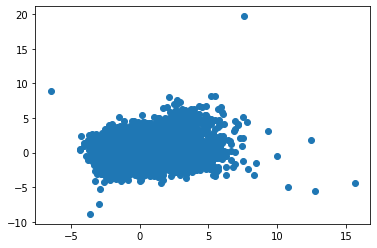

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = k[['SUBJECT_ID', 'bilrubin', 'PO2', 'Oxygen', 'urea_nitrogen',
       'wbc', 'wbc_count', 'bicarbonate', 'sodium_data', 'potassium_data',
       'potassium_whole_blood_data', 'art_blood_pressure', 'temperature',
       'heart_rate']]
y = k['INR']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
plt.scatter(x_pca["PC1"],x_pca["PC2"])

In [0]:
k.columns.values 

array(['SUBJECT_ID', 'INR', 'bilrubin', 'PO2', 'Oxygen', 'urea_nitrogen',
       'wbc', 'wbc_count', 'bicarbonate', 'sodium_data', 'potassium_data',
       'potassium_whole_blood_data', 'art_blood_pressure', 'temperature',
       'heart_rate'], dtype=object)

In [0]:
import tensorflow as tf 
import datetime, os

In [0]:
kkt = c.merging_output_events()

In [66]:
kkt.shape

(2115185, 13)

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [0]:
GAN_code(l)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


  0%|          | 2/2000 [00:00<11:50,  2.81it/s]

Iter: 0
Train_loss: 0.35



  7%|▋         | 140/2000 [00:06<00:59, 31.45it/s]

Iter: 100
Train_loss: 0.155



 11%|█         | 223/2000 [00:06<00:20, 88.19it/s]

Iter: 200
Train_loss: 0.1172



 17%|█▋        | 337/2000 [00:07<00:09, 176.81it/s]

Iter: 300
Train_loss: 0.1022



 22%|██▏       | 436/2000 [00:07<00:07, 223.04it/s]

Iter: 400
Train_loss: 0.09332



 25%|██▌       | 507/2000 [00:08<00:06, 221.64it/s]

Iter: 500
Train_loss: 0.08403



 30%|███       | 606/2000 [00:10<00:35, 39.42it/s]

Iter: 600
Train_loss: 0.07407



 37%|███▋      | 743/2000 [00:12<00:12, 101.82it/s]

Iter: 700
Train_loss: 0.07352



 42%|████▏     | 832/2000 [00:13<00:07, 164.68it/s]

Iter: 800
Train_loss: 0.07057



 47%|████▋     | 944/2000 [00:13<00:05, 203.59it/s]

Iter: 900
Train_loss: 0.06613



 52%|█████▏    | 1032/2000 [00:14<00:04, 206.36it/s]

Iter: 1000
Train_loss: 0.05806



 56%|█████▌    | 1120/2000 [00:15<00:16, 53.53it/s]

Iter: 1100
Train_loss: 0.05923



 61%|██████    | 1212/2000 [00:18<00:22, 34.82it/s]

Iter: 1200
Train_loss: 0.05827



 65%|██████▍   | 1296/2000 [00:21<00:26, 26.75it/s]

Iter: 1300
Train_loss: 0.04578



 70%|███████   | 1402/2000 [00:25<00:20, 29.17it/s]

Iter: 1400
Train_loss: 0.04993



 75%|███████▌  | 1503/2000 [00:28<00:12, 38.31it/s]

Iter: 1500
Train_loss: 0.05421



 82%|████████▏ | 1634/2000 [00:29<00:04, 80.70it/s]

Iter: 1600
Train_loss: 0.04843



 86%|████████▌ | 1724/2000 [00:30<00:03, 91.44it/s]

Iter: 1700
Train_loss: 0.04557



 91%|█████████ | 1816/2000 [00:32<00:02, 64.86it/s]

Iter: 1800
Train_loss: 0.04301



 95%|█████████▌| 1908/2000 [00:33<00:01, 64.03it/s]

Iter: 1900
Train_loss: 0.04865



100%|██████████| 2000/2000 [00:34<00:00, 63.34it/s]

Instructions for updating:
Use `tf.cast` instead.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000010,0.031352,0.014904,0.169283,0.092857,0.168586,0.025927,0.207288,0.424725,0.655684,0.514180,0.208145,0.263658,0.901521,0.377355
1,0.000020,0.021954,0.046719,0.077419,0.088889,0.081250,0.014851,0.177958,0.454583,0.615637,0.443343,0.205172,0.263658,0.623226,0.369097
2,0.000040,0.030926,0.004658,0.189355,0.129599,0.196474,0.025117,0.207288,0.396635,0.646945,0.598300,0.207843,0.263658,0.623226,0.353552
3,0.000070,0.025056,0.007452,0.176613,0.127273,0.112829,0.027813,0.207288,0.464286,0.620786,0.403659,0.138889,0.263658,0.623226,0.351286
4,0.000090,0.024128,0.013041,0.341935,0.126667,0.073915,0.018272,0.207288,0.514957,0.666800,0.476513,0.196078,0.263658,0.623226,0.347013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,0.283518,0.031516,0.046300,0.229181,0.129599,0.119412,0.023695,0.207288,0.483012,0.662904,0.508275,0.205172,0.263658,0.623226,0.637255
46463,0.284498,0.031516,0.046300,0.229181,0.129599,0.119412,0.023695,0.207288,0.483012,0.662904,0.508275,0.205172,0.263658,0.623226,0.586193
46464,0.318949,0.031516,0.046300,0.229181,0.129599,0.119412,0.023695,0.207288,0.483012,0.662904,0.508275,0.205172,0.263658,0.623226,0.578023
46465,0.321460,0.031516,0.046300,0.229181,0.129599,0.119412,0.023695,0.207288,0.483012,0.662904,0.508275,0.205172,0.263658,0.623226,0.227591


In [0]:
import tensorflow as tf 

In [0]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
%tensorboard --logdir logs

In [0]:
def EM_algorithm():
  import numpy as np
  import pandas as pd
  import random as rand
  import matplotlib.pyplot as plt
  from scipy.stats import norm
  from sys import maxint

  ### Setup
  # set random seed
  rand.seed(42)

  # 2 clusters
  # not that both covariance matrices are diagonal
  mu1 = [0, 5]
  sig1 = [ [2, 0], [0, 3] ]

  mu2 = [5, 0]
  sig2 = [ [4, 0], [0, 1] ]

  # generate samples
  x1, y1 = np.random.multivariate_normal(mu1, sig1, 100).T
  x2, y2 = np.random.multivariate_normal(mu2, sig2, 100).T

  xs = np.concatenate((x1, x2))
  ys = np.concatenate((y1, y2))
  labels = ([1] * 100) + ([2] * 100)

  data = {'x': xs, 'y': ys, 'label': labels}
  df = pd.DataFrame(data=data)

  # inspect the data
  df.head()
  df.tail()

  fig = plt.figure()
  plt.scatter(data['x'], data['y'], 24, c=data['label'])
  fig.savefig("true-values.png")

  ### Expectation-maximization

  # initial guesses - intentionally bad
  guess = { 'mu1': [1,1],
            'sig1': [ [1, 0], [0, 1] ],
            'mu2': [4,4],
            'sig2': [ [1, 0], [0, 1] ],
            'lambda': [0.4, 0.6]
          }

  # probability that a point came from a Guassian with given parameters
  # note that the covariance must be diagonal for this to work
  def prob(val, mu, sig, lam):
    p = lam
    for i in range(len(val)):
      p *= norm.pdf(val[i], mu[i], sig[i][i])
    return p


  # assign every data point to its most likely cluster
  def expectation(dataFrame, parameters):
    for i in range(dataFrame.shape[0]):
      x = dataFrame['x'][i]
      y = dataFrame['y'][i]
      p_cluster1 = prob([x, y], list(parameters['mu1']), list(parameters['sig1']), parameters['lambda'][0] )
      p_cluster2 = prob([x, y], list(parameters['mu2']), list(parameters['sig2']), parameters['lambda'][1] )
      if p_cluster1 > p_cluster2:
        dataFrame['label'][i] = 1
      else:
        dataFrame['label'][i] = 2
    return dataFrame


  # update estimates of lambda, mu and sigma
  def maximization(dataFrame, parameters):
    points_assigned_to_cluster1 = dataFrame[dataFrame['label'] == 1]
    points_assigned_to_cluster2 = dataFrame[dataFrame['label'] == 2]
    percent_assigned_to_cluster1 = len(points_assigned_to_cluster1) / float(len(dataFrame))
    percent_assigned_to_cluster2 = 1 - percent_assigned_to_cluster1
    parameters['lambda'] = [percent_assigned_to_cluster1, percent_assigned_to_cluster2 ]
    parameters['mu1'] = [points_assigned_to_cluster1['x'].mean(), points_assigned_to_cluster1['y'].mean()]
    parameters['mu2'] = [points_assigned_to_cluster2['x'].mean(), points_assigned_to_cluster2['y'].mean()]
    parameters['sig1'] = [ [points_assigned_to_cluster1['x'].std(), 0 ], [ 0, points_assigned_to_cluster1['y'].std() ] ]
    parameters['sig2'] = [ [points_assigned_to_cluster2['x'].std(), 0 ], [ 0, points_assigned_to_cluster2['y'].std() ] ]
    return parameters

  # get the distance between points
  # used for determining if params have converged
  def distance(old_params, new_params):
    dist = 0
    for param in ['mu1', 'mu2']:
      for i in range(len(old_params)):
        dist += (old_params[param][i] - new_params[param][i]) ** 2
    return dist ** 0.5

  # loop until parameters converge
  shift = maxint
  epsilon = 0.01
  iters = 0
  df_copy = df.copy()
  # randomly assign points to their initial clusters
  df_copy['label'] = map(lambda x: x+1, np.random.choice(2, len(df)))
  params = pd.DataFrame(guess)

  while shift > epsilon:
    iters += 1
    # E-step
    updated_labels = expectation(df_copy.copy(), params)

    # M-step
    updated_parameters = maximization(updated_labels, params.copy())

    # see if our estimates of mu have changed
    # could incorporate all params, or overall log-likelihood
    shift = distance(params, updated_parameters)

    # logging
    print("iteration {}, shift {}".format(iters, shift))

    # update labels and params for the next iteration
    df_copy = updated_labels
    params = updated_parameters

    fig = plt.figure()
    plt.scatter(df_copy['x'], df_copy['y'], 24, c=df_copy['label'])
    fig.savefig("iteration{}.png".format(iters))

In [0]:
EM_algorithm()

In [0]:
import fancyimpute

In [0]:
X_incomplete = b 

In [0]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN
# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).fit_transform(X_incomplete)

# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
X_filled_nnm = NuclearNormMinimization().fit_transform(X_incomplete)

# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
X_incomplete_normalized = BiScaler().fit_transform(X_incomplete)
X_filled_softimpute = SoftImpute().fit_transform(X_incomplete_normalized)

# print mean squared error for the  imputation methods above
nnm_mse = ((X_filled_nnm[missing_mask] - X[missing_mask]) ** 2).mean()
print("Nuclear norm minimization MSE: %f" % nnm_mse)

softImpute_mse = ((X_filled_softimpute[missing_mask] - X[missing_mask]) ** 2).mean()
print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((X_filled_knn[missing_mask] - X[missing_mask]) ** 2).mean()
print("knnImpute MSE: %f" % knn_mse)

In [0]:
df['name'].replace("J[O]H?NATH?[AO]N?", np.na, regex=True, inplace=True)

In [0]:
INR_data

In [0]:
kk = c.merging_lab_events()

In [57]:
kk

,SUBJECT_ID,INR,CHARTTIME,bilrubin,PO2,Oxygen,urea_nitrogen,wbc,wbc_count,bicarbonate,sodium_data,potassium_data,potassium_whole_blood_data
0,3,1.5,2101-10-23 03:45:00,NaN,NaN,NaN,30,12.5,NaN,15,135,4.1,NaN
1,3,1.7,2101-10-20 19:26:00,NaN,NaN,NaN,41,11.3,NaN,13,143,4.0,NaN
2,3,1.7,2101-10-20 19:59:00,0.8,NaN,NaN,43,19.1,NaN,11,140,4.1,NaN
3,3,1.3,2101-10-20 16:40:00,NaN,NaN,NaN,53,12.7,NaN,25,136,5.4,NaN
4,3,1.3,2101-10-05 06:00:00,NaN,NaN,NaN,35,9.4,NaN,27,139,4.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609154,98994,NaN,2137-08-04 03:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8
1609155,99229,NaN,2125-12-17 18:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
1609156,98864,NaN,2168-10-13 19:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1
1609157,99018,NaN,2118-10-19 03:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6


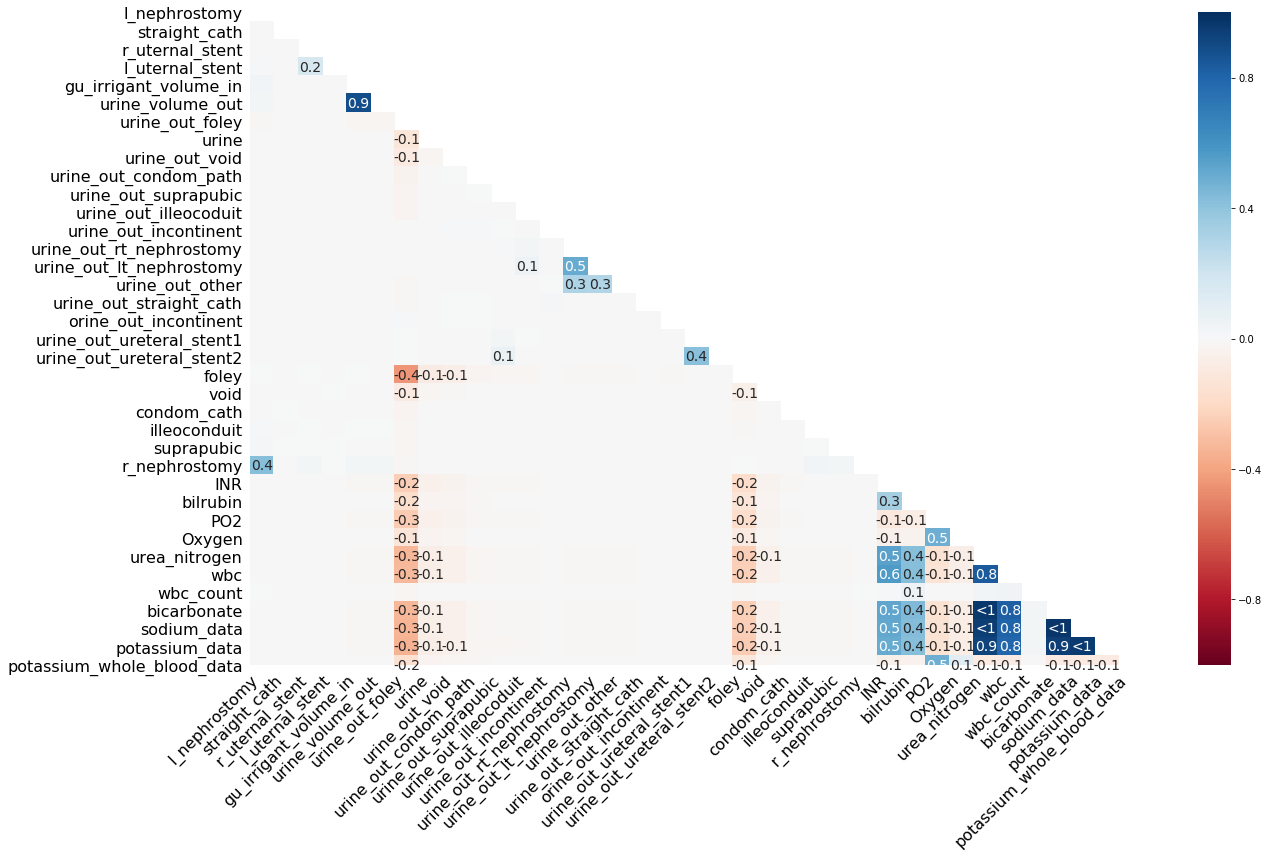

In [76]:
import missingno as msno
"""merged_df = p 
missinigdata_df = merged_df.columns[merged_df.isnull().any()].tolist()
msno.matrix(merged_df[missingdata_df])
msno.bar(merged_df[missingdata_df], color="blue", log=True, figsize=(30,18))

merged_df = pd.merge(train_df,properties_df)
missingdata_df = merged_df.columns[merged_df.isnull().any()].tolist()
msno.matrix(merged_df[missingdata_df])"""
msno.heatmap(complete)

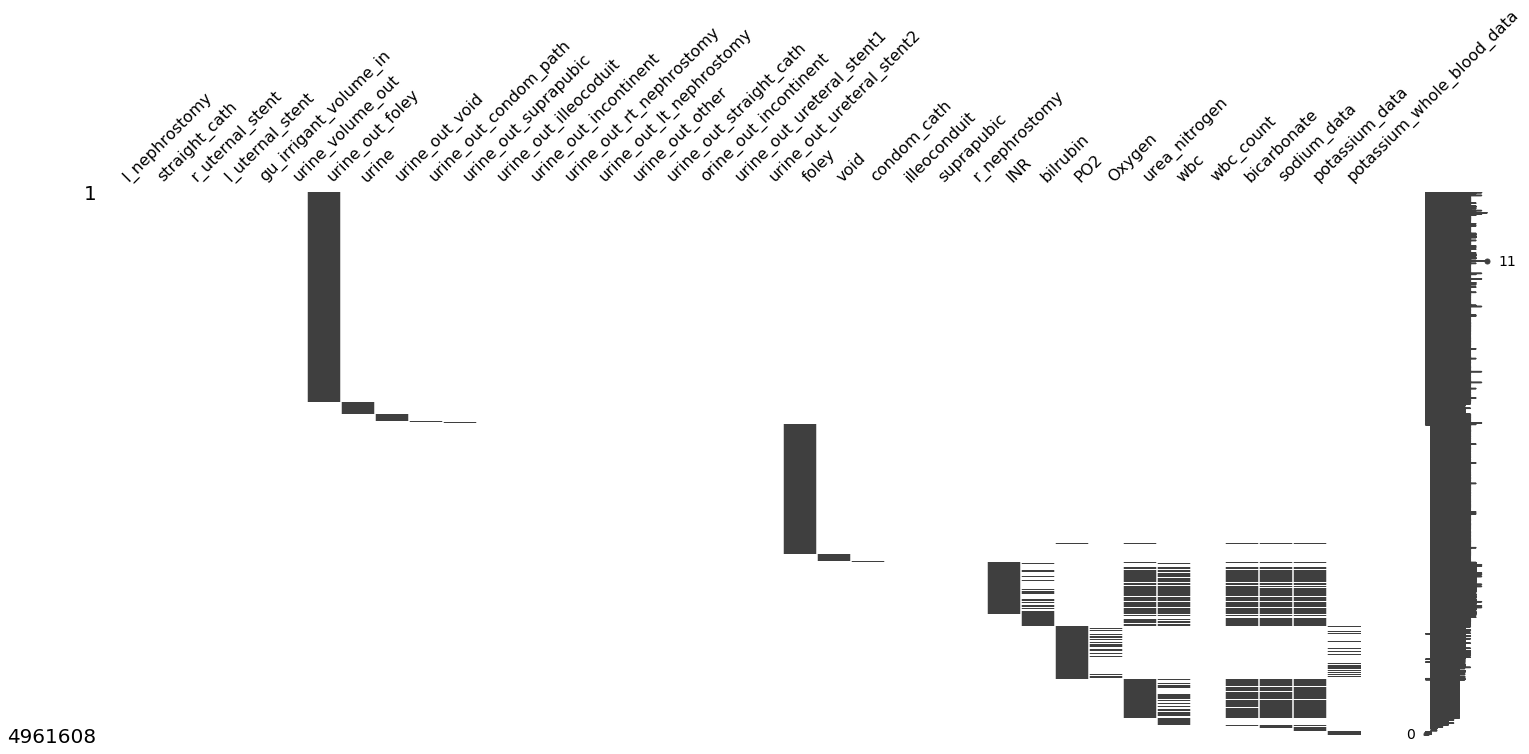

In [81]:
missingdata_df = complete.columns[complete.isnull().any()].tolist()
msno.matrix(complete[missingdata_df])
#msno.bar(complete[missingdata_df], color="blue", log=True, figsize=(30,18))

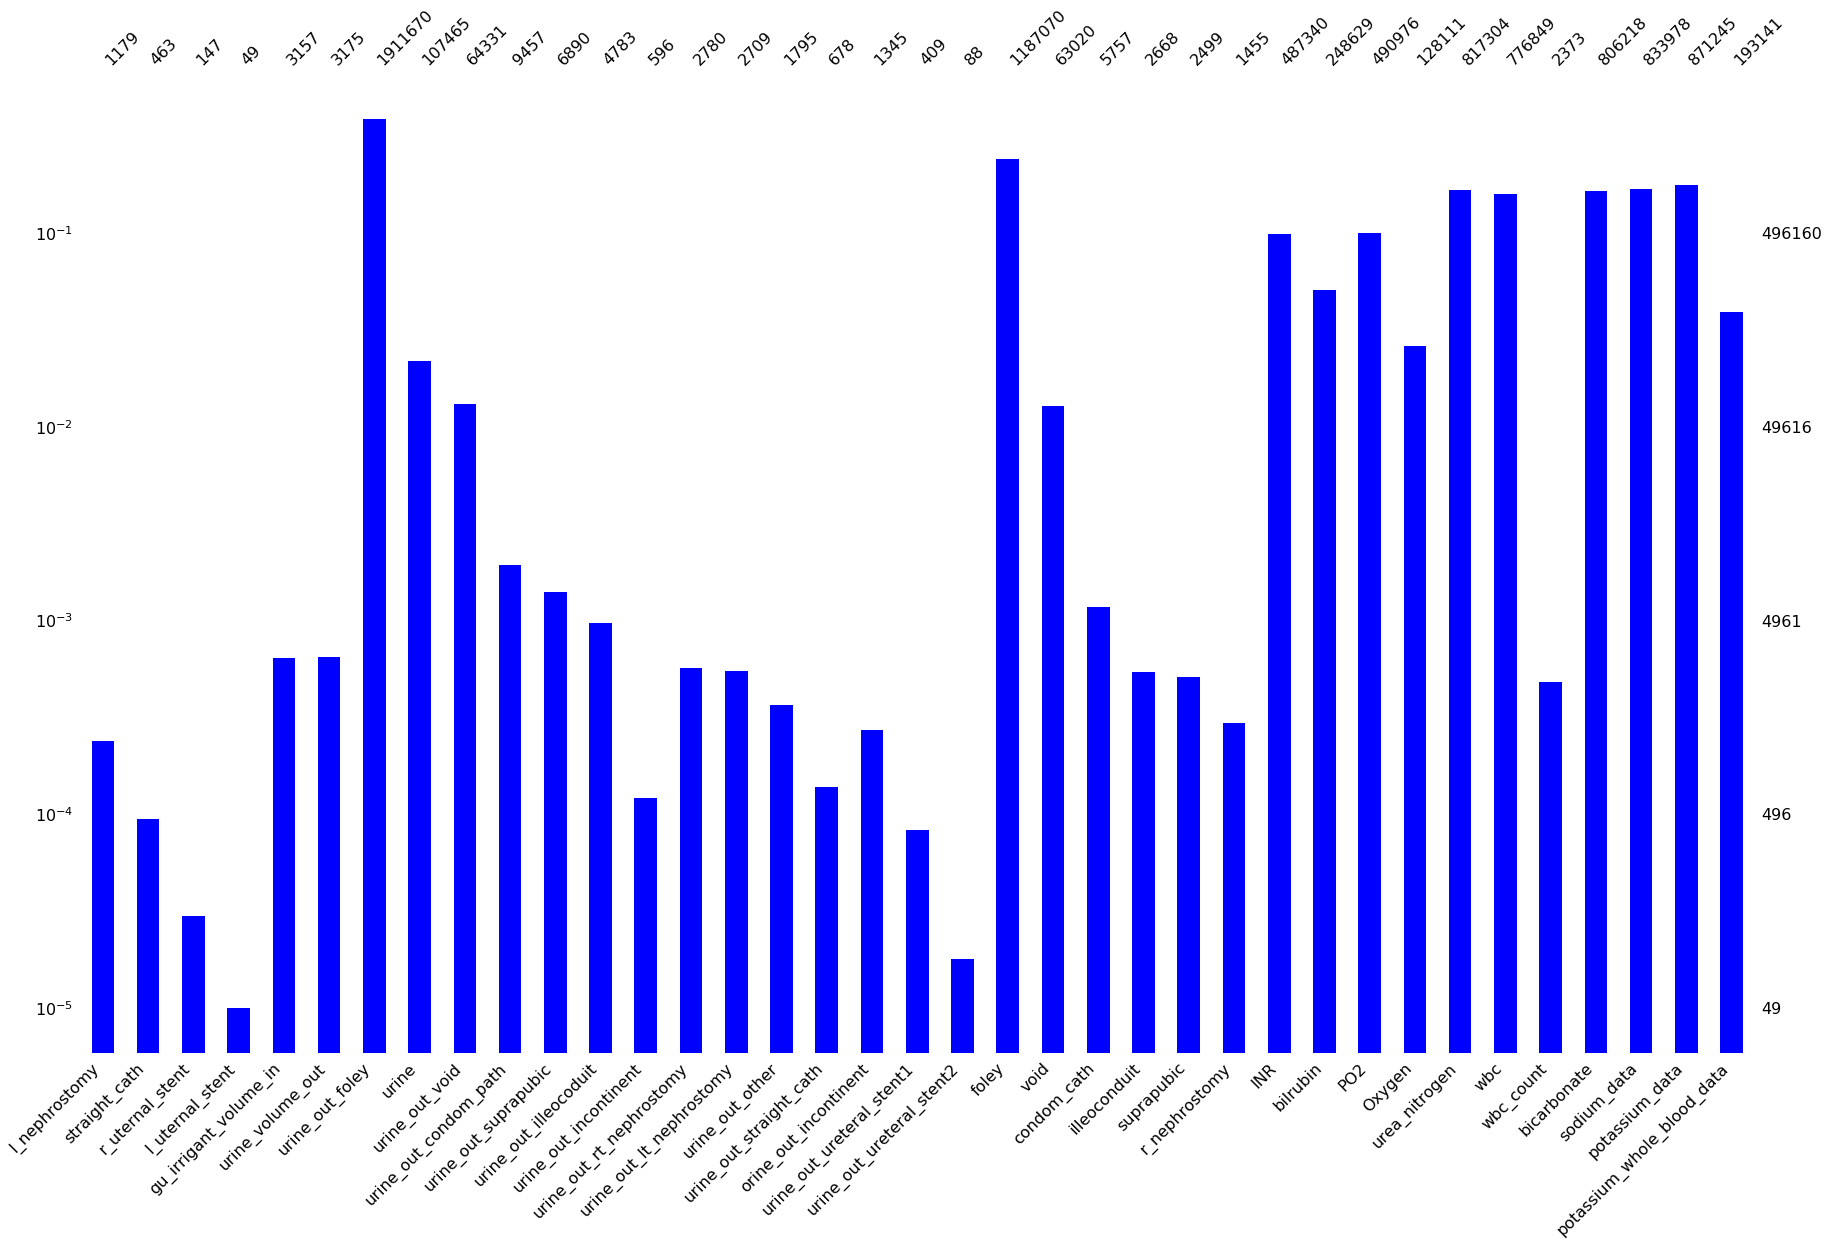

In [82]:
msno.bar(complete[missingdata_df], color="blue", log=True, figsize=(30,18))

In [0]:
complete.to_csv("complete.csv")

In [0]:
d = missing()

In [0]:
import numpy as np


In [0]:
new =pd.to_numeric(complete, errors='coerce').fillna(np.nan)

In [0]:
complete.INR.unique()

In [0]:
k = pd.to_numeric(complete["INR"], errors='coerce').fillna(np.nan)

In [0]:
df = complete
df[cols] = df[cols].applymap(lambda x: np.nan if isinstance(x, str) else x)


In [97]:
complete.INR.unique()

array([nan])

In [96]:
df

,SUBJECT_ID,CHARTTIME,l_nephrostomy,straight_cath,r_uternal_stent,l_uternal_stent,gu_irrigant_volume_in,urine_volume_out,urine_out_foley,urine,urine_out_void,urine_out_condom_path,urine_out_suprapubic,urine_out_illeocoduit,urine_out_incontinent,urine_out_rt_nephrostomy,urine_out_lt_nephrostomy,urine_out_other,urine_out_straight_cath,orine_out_incontinent,urine_out_ureteral_stent1,urine_out_ureteral_stent2,foley,void,condom_cath,illeoconduit,suprapubic,r_nephrostomy,INR,bilrubin,PO2,Oxygen,urea_nitrogen,wbc,wbc_count,bicarbonate,sodium_data,potassium_data,potassium_whole_blood_data
0,29426,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29426,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29426,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29426,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29426,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961603,98994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961604,99229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961605,98864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961606,99018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
https://stackoverflow.com/questions/47001413/how-to-replace-any-strings-with-nan-in-pandas-dataframe-using-a-boolean-mask

SyntaxError: ignored